<a href="https://colab.research.google.com/github/prisawant/deeplearning.ai.assignments/blob/graphNN/graphNN_wikipages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation from blogpost: https://medium.com/analytics-vidhya/learn-how-to-perform-feature-extraction-from-graphs-using-deepwalk-85437bb8363e


In [0]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/prisawant/deeplearning.ai.assignments/graphNN/space_data.tsv'
df = pd.read_csv(url, sep = "\t")
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [0]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [5]:
len(G)

2088

## Random Walk

In [0]:
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [7]:
get_randomwalk('space exploration', 10)

['space exploration',
 'monkeys in space',
 'ham (chimpanzee)',
 'monkeys and non-human apes in space',
 'alice king chatham',
 'monkeys and apes in space',
 'laika',
 'russian space dogs',
 'sputnik program',
 'lists of spacecraft']

In [8]:
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))
        
# count of sequences
len(random_walks)

100%|██████████| 2088/2088 [00:00<00:00, 10629.11it/s]


10440

## DeepWalk


In [0]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [10]:
# train skip-gram (word2vec) model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(976049, 1005700)

In [11]:
model.similar_by_word('space tourism')

[('space flight participant', 0.8067325353622437),
 ('astronaut training', 0.7908955216407776),
 ('reduced-gravity aircraft', 0.7879847288131714),
 ('space adventures', 0.7510075569152832),
 ('commercial astronaut', 0.7487378120422363),
 ('seti', 0.746997594833374),
 ('rocketship tours', 0.7440052032470703),
 ('space tourism society', 0.7297300100326538),
 ('ultralight aviation', 0.7125697135925293),
 ('potential cultural impact of extraterrestrial contact', 0.7104005813598633)]

In [0]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 
         'moon landing','space food', 'food systems on space exploration missions', 
         'meal, ready-to-eat','space law', 'metalaw', 'moon treaty', 
         'legal aspects of computing','astronaut training', 'reduced-gravity aircraft', 
         'space adaptation syndrome', 'micro-g environment']

In [0]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

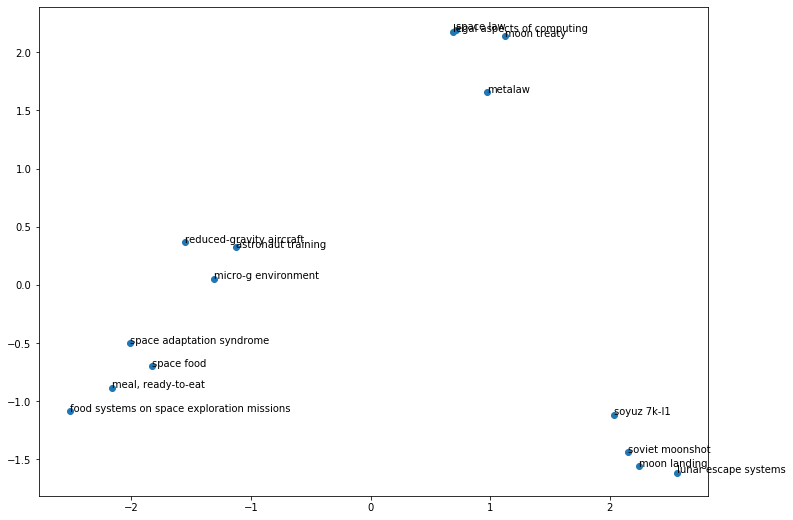

In [14]:
plot_nodes(terms)